In [2]:
import numpy as np
import scipy.stats as st
from astropy.io import fits,ascii
from astropy.time import Time
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec


%matplotlib inline

# Example of loading fits file and plotting lightcurve

In [3]:
lc_319_5ks = fits.open('1399_319_C_sub_lc_5ks.fits')[1].data
lc_319_1ks = fits.open('1399_319_C_sub_lc_1ks.fits')[1].data



/home/kcdage/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


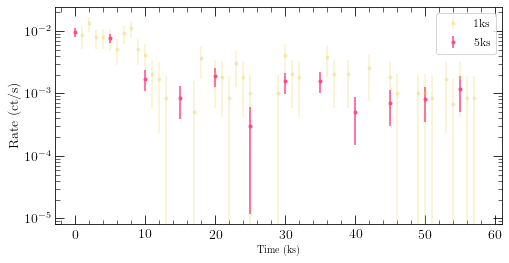

In [4]:

plt.figure(figsize=(8,4))
plt.errorbar((lc_319_1ks['TIME']-lc_319_1ks['TIME'][0])/1000,lc_319_1ks['NET_RATE'],lc_319_1ks['ERR_RATE'],fmt='.', color=palettable.cubehelix.cubehelix3_16.mpl_colors[12],alpha=0.3, label='1ks')
plt.errorbar((lc_319_5ks['TIME']-lc_319_5ks['TIME'][0])/1000,lc_319_5ks['NET_RATE'],lc_319_5ks['ERR_RATE'], color=palettable.cubehelix.cubehelix3_16.mpl_colors[9], fmt='.',alpha=1.0, label='5ks')
plt.legend(loc=1,numpoints=1,fontsize=12)
plt.xlabel('Time (ks)')
plt.ylabel('Rate (ct/s)', fontsize=14)
plt.yscale('log')

#formatting for tick marks
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right='on',top='on')
#plt.savefig('lc_319_1ks_5ks.pdf')


# Example of how to search for periodic signals using Lomb-Scargle periodogram

In [12]:
from astropy.stats import LombScargle
frequency, power = LombScargle(lc_319_5ks['TIME'], lc_319_5ks['NET_RATE']).autopower()

frequency2, power2 = LombScargle(lc_319_1ks['TIME'], lc_319_1ks['NET_RATE']).autopower()

Text(0,0.5,'Power')

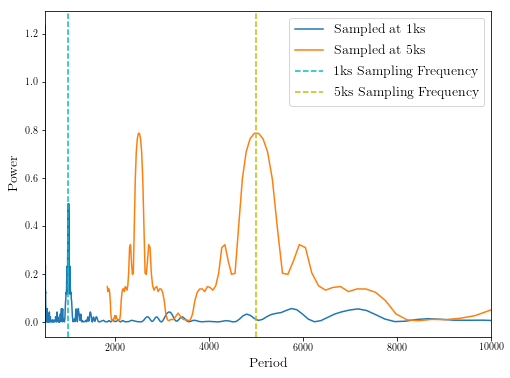

In [28]:
plt.figure(figsize=(8,6))
plt.plot(1.0/frequency2, power2, label='Sampled at 1ks')


plt.plot(1.0/frequency, power, label='Sampled at 5ks')
plt.axvline(x=1000, color='c', ls='--',  label='1ks Sampling Frequency')
plt.axvline(x=5000,   color='y', ls='--', label='5ks Sampling Frequency')

plt.xlim(500, 10000)
plt.legend(loc=1, fontsize=14)
plt.xlabel('Period (ks)', fontsize=14)
plt.ylabel('Power', fontsize=14)
